In [1]:
!pip install keras
!pip install visualkeras
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 10.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 66.8 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.3 which is incompatible.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dataproc-jupyter-plugin 0

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import warnings
import string
import nltk
from nltk.corpus import stopwords
from tensorflow import keras
import gensim.models
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import tensorflow as tf
from tensorflow.keras import initializers, preprocessing
import tensorflow_hub as hub
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
df_reddit = pd.read_csv('/kaggle/input/datasett/Reddit_Data(1).csv')
# df_twitter = pd.read_csv('/kaggle/input/dataset/Twitter_Data(1).csv')

In [5]:
# df_twitter.rename(columns = {'clean_text':'clean_comment'}, inplace = True)

In [6]:
df_reddit.shape

(37249, 2)

In [7]:
# df = pd.concat([df_reddit, df_twitter], ignore_index=True)
df = df_reddit.sample(frac=0.2,random_state=42)

In [8]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

df['category'].iplot(
    kind='hist',
    xTitle='Categories',
    linecolor='black',
    yTitle='count',
    title='Category Distribution')

In [9]:
pd.DataFrame(df['clean_comment'].str.len())['clean_comment'].iplot(
    kind='hist',
    bins=70,
    xTitle='String length',
    linecolor='black',
    yTitle='count',
    title='String Length Distribution')

In [10]:
df['word_count'] = df['clean_comment'].str.split().str.len()
df['word_count'].iplot(
    kind='hist',
    bins=70,
    xTitle='String length',
    linecolor='black',
    yTitle='count',
    title='Word Count Distribution')

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['clean_comment'].dropna().tolist(), 20)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words Combined')

In [12]:
!pip install plotly

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



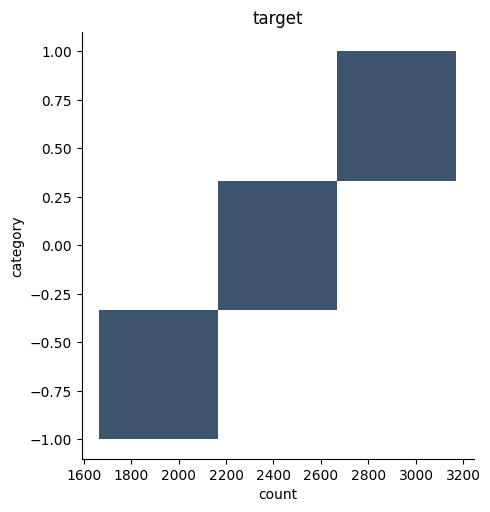

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

locations_vc = df["category"].value_counts()
sns.displot(y=locations_vc.index, x=locations_vc)
plt.title("target")
plt.show()

/tmp/ipykernel_30/1466733055.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='clean_comment', ylabel='Density'>

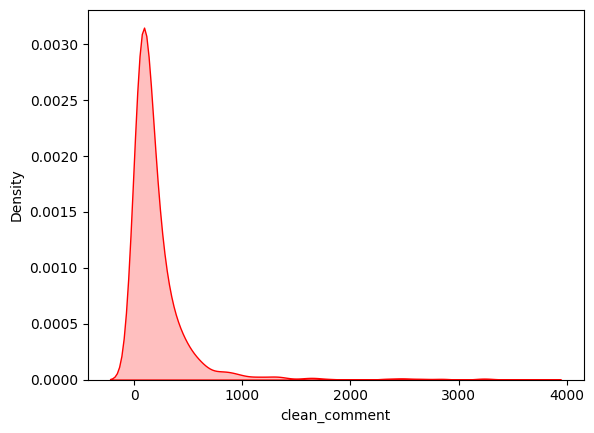

In [14]:
sns.kdeplot(df[df['category'] == -1]['clean_comment'].str.len(), shade=True, color='red')

/tmp/ipykernel_30/1631733317.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='clean_comment', ylabel='Density'>

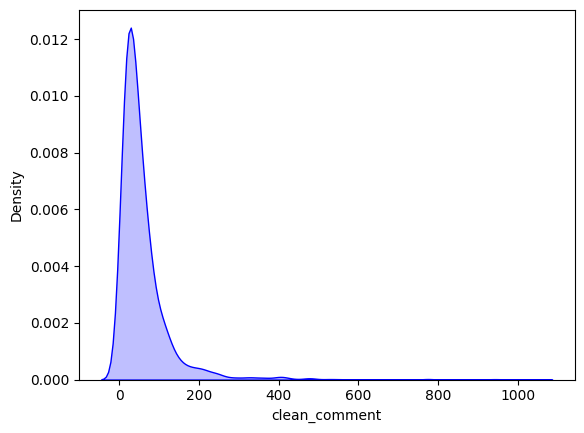

In [15]:
sns.kdeplot(df[df['category'] == 0]['clean_comment'].str.len(), shade=True, color= 'blue')

/tmp/ipykernel_30/2039150682.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='clean_comment', ylabel='Density'>

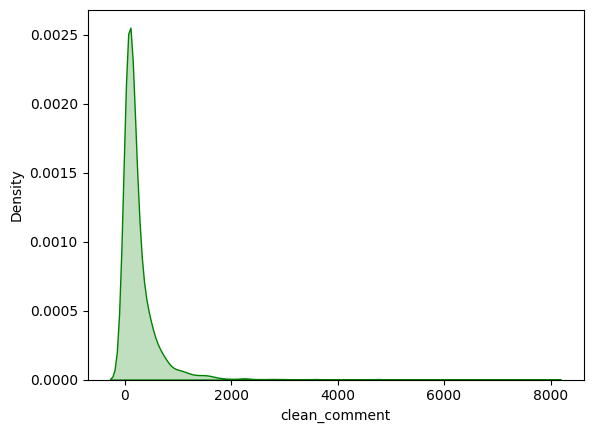

In [16]:
sns.kdeplot(df[df['category'] == 1]['clean_comment'].str.len(), shade=True, color= 'green')

In [17]:
import plotly.express as px
fig = px.density_heatmap(df, x='category')
fig.update_layout(
    title='label density heatmap',
    xaxis = dict(
        showgrid=True,
        rangeslider = dict(
            visible=True,
            thickness=0.05
        )
    ),
    yaxis = dict(
        showgrid=True
    ),
    legend = dict(
        orientation='v'
    ),
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [18]:
def rename(val):
    if val == -1:
        return "Negative"
    elif val == 0:
        return "Neutral"
    elif val ==1:
        return "Positive"

In [19]:
df[["clean_comment", "category"]].describe(include='all')

,clean_comment,category
count,7431,7450.000000
unique,7399,NaN
top,,NaN
freq,19,NaN
mean,NaN,0.201477
std,NaN,0.780053
min,NaN,-1.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [20]:
df.isnull().sum()

clean_comment    19
category          0
word_count       19
dtype: int64

In [21]:
df = df.dropna()
df.shape

(7431, 3)

In [22]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


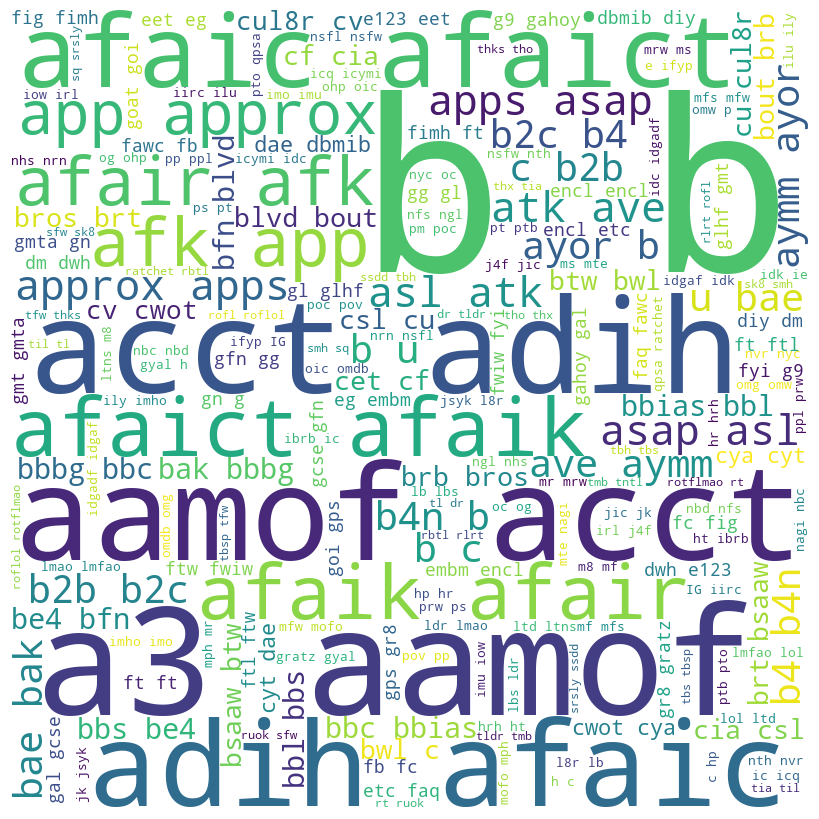

In [23]:
#Generating Word Cloud
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

token = list(abbreviations.keys())
comment_words = ''
stopWords = set(stopwords.words('english'))


for i in range(len(token)):
    token[i] = token[i].lower()

    comment_words += " ".join(token)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopWords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [24]:
# Remove all URLs, replace by URL
import re
import string
from nltk.stem import WordNetLemmatizer
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',str(text))


# Remove HTML beacon
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# Change an abbreviation by its true meaning
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "
    return string

# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)


# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)



# Replace some others smileys with SADFACE
def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)


# Replace some smileys with SMILE
def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)


# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)


# Factorize elongated words, add ELONG
def remove_elongated_words(text):
    rep = re.compile(r'\b(\S*?)([a-z])\2{2,}\b')
    return rep.sub(r'\1\2 ELONG', text)


# Factorize repeated punctuation, add REPEAT
def remove_repeat_punct(text):
    rep = re.compile(r'([!?.]){2,}')
    return rep.sub(r'\1 REPEAT', text)



# Remove all punctuations
def remove_all_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)


# Remove punctuations
def remove_punct(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        text = text.replace(p, f' {p} ')

    text = text.replace('...', ' ... ')
    if '...' not in text:
        text = text.replace('..', ' ... ')
    return text


# Remove all english stopwords
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

def stemming(text):
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

def lemmatization(text):
    lm= WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text


In [25]:
 def clean_text(text):

    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    text = remove_not_ASCII(text)

    # Lower text, replace abbreviations
    text = replace_abbrev(text)
    text = remove_mention(text)
    text = remove_number(text)

    # Remove  smileys

    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)

    # Remove repeated puntuations / words
    text = remove_elongated_words(text)
    text = remove_repeat_punct(text)

    text = remove_all_punct(text)
    text = remove_punct(text)
    text = lemmatization(text)
    text = text.lower()

    return text

In [26]:
!pip install nltk

In [27]:
import nltk

In [28]:
nltk.download('wordnet')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/co

In [29]:
df["clean_comment"] = df["clean_comment"].apply(clean_text)

In [30]:
g=[]
for i in df['clean_comment']:
    g.append(i)

In [31]:
maxl = max([len(s) for s in g])
print ('Maximum sequence length in the list of sentences:', maxl)

Maximum sequence length in the list of sentences: 7664


In [32]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize and fit Tokenizer
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['clean_comment'].values)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

# Save Tokenizer and word index to pickle files
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

with open('word_index.pkl', 'wb') as f:
    pickle.dump(word_index, f)

print("Tokenizer and word index saved.")


Found 18214 unique tokens.
Tokenizer and word index saved.


In [33]:
maxl = 3000
X = tokenizer.texts_to_sequences(df['clean_comment'].values)
X = pad_sequences(X, maxlen=maxl)

In [34]:
print(df.iloc[:5])

                                           clean_comment  category  word_count
31771          wish shake hand with these people one day         0         8.0
30819                                why be they all fat         0         5.0
5100   this just be overly dramatic the ramble the ua...         1       203.0
7646   you man which evident because you come trash b...         1        23.0
13781  post date differ base the country the post vis...        -1        23.0


In [35]:
!pip install transformers

In [36]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random
import time


In [37]:
# Encode labels
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

In [38]:
# Tokenize the text
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case=True)
encoded_data = tokenizer.batch_encode_plus(
    df['clean_comment'].values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True, 
    max_length=256, 
    return_tensors='pt', 
    truncation=True
)

input_ids = encoded_data['input_ids']
attention_masks = encoded_data['attention_mask']
labels = torch.tensor(df['category_encoded'].values)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



In [39]:
# Train-validation split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    input_ids, 
    labels, 
    random_state=42, 
    test_size=0.1
)
train_masks, test_masks, _, _ = train_test_split(
    attention_masks, 
    input_ids, 
    random_state=42, 
    test_size=0.1
)


In [40]:
# DataLoader
train_dataset = TensorDataset(train_inputs, train_masks, train_labels)
validation_dataset = TensorDataset(test_inputs, test_masks, test_labels)

batch_size = 64

train_dataloader = DataLoader(
    train_dataset,  
    sampler=RandomSampler(train_dataset), 
    batch_size=batch_size
)
validation_dataloader = DataLoader(
    validation_dataset,
    sampler=SequentialSampler(validation_dataset),
    batch_size=batch_size
)

In [41]:
conda install pytorch torchvision torchaudio cudatoolkit=12.1 -c pytorch

Retrieving notices: ...working... done
Channels:
 - pytorch
 - rapidsai
 - nvidia
 - nodefaults
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - cudatoolkit=12.1*

Current channels:

  - https://conda.anaconda.org/pytorch
  - https://conda.anaconda.org/rapidsai
  - https://conda.anaconda.org/nvidia
  - https://conda.anaconda.org/nodefaults
  - https://conda.anaconda.org/conda-forge
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [42]:
# Load pre-trained RoBERTa model
model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base", 
    num_labels=len(label_encoder.classes_), 
    output_attentions=False, 
    output_hidden_states=False
)
# model.cuda() # Use GPU

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [43]:
# Optimizer
optimizer = AdamW(
  model.parameters(),
  lr = 2e-5, 
  eps = 1e-8 
)

epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(
  optimizer, 
  num_warmup_steps = 0,
  num_training_steps = total_steps
)

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



In [44]:
seed_val = 42
random.seed(seed_val)
torch.manual_seed(seed_val)

training_stats = []

for epoch_i in range(0, epochs):
  print(f'======== Epoch {epoch_i + 1} / {epochs} ========')

  t0 = time.time()

  total_train_loss = 0
  model.train()

  for step, batch in enumerate(train_dataloader):
    if step % 40 == 0 and not step == 0:
      elapsed = time.time() - t0
      print(f'  Batch {step} of {len(train_dataloader)}. Elapsed: {elapsed:.2f} seconds.')  # Print elapsed time directly

    # No device assignment needed for CPU
    b_input_ids = batch[0]
    b_input_mask = batch[1]
    b_labels = batch[2]

    model.zero_grad()
    outputs = model(
        b_input_ids,
        token_type_ids=None,
        attention_mask=b_input_mask,
        labels=b_labels
    )

    loss = outputs[0]
    total_train_loss += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    scheduler.step()

  avg_train_loss = total_train_loss / len(train_dataloader)

  training_time = time.time() - t0

  print(f'  Average training loss: {avg_train_loss:.2f}')
  print(f'  Training epoch took: {training_time:.2f} seconds.')


======== Epoch 1 / 3 ========
  Batch 40 of 105. Elapsed: 4297.01 seconds.
  Batch 80 of 105. Elapsed: 8471.03 seconds.
  Average training loss: 0.89
  Training epoch took: 11014.01 seconds.
======== Epoch 2 / 3 ========
  Batch 40 of 105. Elapsed: 3901.01 seconds.
  Batch 80 of 105. Elapsed: 7671.19 seconds.
  Average training loss: 0.67
  Training epoch took: 9962.76 seconds.
======== Epoch 3 / 3 ========
  Batch 40 of 105. Elapsed: 3857.68 seconds.
  Batch 80 of 105. Elapsed: 7722.18 seconds.
  Average training loss: 0.53
  Training epoch took: 10037.51 seconds.


In [45]:
from sklearn.metrics import accuracy_score

# Function to predict labels
def predict_labels(model, dataloader):
    model.eval()
    predictions , true_labels = [], []
    for batch in dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }
        with torch.no_grad():        
            outputs = model(**inputs)
        logits = outputs[1].detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.extend(np.argmax(logits, axis=1))
        true_labels.extend(label_ids)
    return true_labels, predictions


In [46]:
# Convert data to PyTorch tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_inputs, test_masks, test_labels = test_inputs.to(device), test_masks.to(device), test_labels.to(device)

In [47]:
# Create DataLoader
test_dataset = TensorDataset(test_inputs, test_masks, test_labels)
test_dataloader = DataLoader(
    test_dataset,
    sampler=SequentialSampler(test_dataset),
    batch_size=batch_size
)

In [48]:
# Predict
true_labels, predicted_labels = predict_labels(model, test_dataloader)

In [49]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7365591397849462


In [50]:
from sklearn.metrics import f1_score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f'f1-Score: {f1}')

f1-Score: 0.7378298018318583


In [2]:
import pickle
# Assuming 'model' is your trained model object
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


NameError: name 'model' is not defined

In [1]:
import torch
from transformers import RobertaTokenizer

# Assuming you have defined the rename function
def rename(val):
    if val == 1:
        return "Negative"
    elif val == 0:
        return "Neutral"
    elif val == 2:
        return "Positive"

# Load the trained tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case=True)

# Define the input sentence
input_sentence = "O just hate to see the face of you everyday"

# Tokenize the input sentence using the Roberta tokenizer
encoded_data = tokenizer.encode_plus(
    input_sentence, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True, 
    max_length=256, 
    truncation=True,
    return_tensors='pt'
)

input_ids = encoded_data['input_ids']
attention_masks = encoded_data['attention_mask']

# Assuming you have defined device properly
# Convert data to PyTorch tensors and move to the appropriate device
input_ids = input_ids.to(device)
attention_masks = attention_masks.to(device)

# Disable gradient calculation to speed up predictions
with torch.no_grad():
    # Forward pass, get the model outputs
    outputs = model(input_ids=input_ids, attention_mask=attention_masks)
    # Print the logits to check the output
    print("Logits:", outputs.logits)
    # Get the predicted sentiment category
    predicted_label = torch.argmax(outputs.logits).item()

# Convert the predicted label into human-readable sentiment category
predicted_sentiment = rename(predicted_label)

# Display the predicted sentiment category
print("Predicted Sentiment:", predicted_sentiment)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


NameError: name 'device' is not defined

In [53]:
import pickle

# Assuming you have defined your model as 'model'
# Serialize the model
with open('modelnew.pkl', 'wb') as f:
    pickle.dump(model, f)

In [54]:
df['clean_comment']

31771            wish shake hand with these people one day
30819                                  why be they all fat
5100     this just be overly dramatic the ramble the ua...
7646     you man which evident because you come trash b...
13781    post date differ base the country the post vis...
                               ...                        
5426     sono appena tornata fra monti dopo mesi lido j...
21789    there have be some surprise and some disappoin...
4842     apology isn do think bjp should sack ram madha...
25644                             why elections our island
15860    when the creme creme indian economy who can af...
Name: clean_comment, Length: 7431, dtype: object